In [1]:
import pandas as pd
import numpy as np
import orbit
import matplotlib.pyplot as plt

from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.plot import get_orbit_style
plt.style.use(get_orbit_style())
from orbit.models import ETS

In [2]:
orbit.__version__

'1.1.0dev'

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
raw_df = load_iclaims()

raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df = raw_df.copy()

In [6]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [8]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [8]:
# # import logging
# # logger = logging.getLogger()
# # logger.setLevel(logging.CRITICAL)
# # logging.getLogger("pystan").propagate=False
# # import sys
# # logging.disable(sys.maxsize)
# import logging
# logger = logging.getLogger("pystan")
# # add root logger (logger Level always Warning)
# # not needed if PyStan already imported
# logger.addHandler(logging.NullHandler())
# logger.propagate = False


In [9]:
ets = ETS(response_col='claims',
          date_col='week',
          seasonality=52,
          seed=2020,
          estimator='stan-mcmc',
)

In [10]:
# import sys
# import os
# null_fds = os.open(os.devnull, os.O_RDWR)

In [11]:
# %%capture
# sys.stdout = open(null_fds, 'w')

In [10]:
print("Hi")

Hi


In [11]:
ets.fit(train_df)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_982090c5656030fa038b63e5c383dbff NOW.
In file included from /var/folders/ln/k7ffpq9d62z_r4bhk5vyj6z40000gn/T/pystan_cfo8es0v/stanfit4anon_model_982090c5656030fa038b63e5c383dbff_1725501185230232107.cpp:701:
In file included from /Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1944:
/Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VER


Gradient evaluation took 0.000315 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.15 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000362 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.62 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000361 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.61 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000333 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.33 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  50 / 250 [ 20%]  (Warmup)
It

Iteration: 250 / 250 [100%]  (Sampling)
Iteration: 225 / 250 [ 90%]  (Warmup)
Iteration: 226 / 250 [ 90%]  (Sampling)

 Elapsed Time: 0.590248 seconds (Warm-up)
               0.058004 seconds (Sampling)
               0.648252 seconds (Total)

Iteration: 225 / 250 [ 90%]  (Warmup)
Iteration: 226 / 250 [ 90%]  (Sampling)
Iteration: 225 / 250 [ 90%]  (Warmup)
Iteration: 226 / 250 [ 90%]  (Sampling)
Iteration: 250 / 250 [100%]  (Sampling)

 Elapsed Time: 0.648646 seconds (Warm-up)
               0.05809 seconds (Sampling)
               0.706736 seconds (Total)

Iteration: 250 / 250 [100%]  (Sampling)

 Elapsed Time: 0.655184 seconds (Warm-up)
               0.0583 seconds (Sampling)
               0.713484 seconds (Total)

Iteration: 250 / 250 [100%]  (Sampling)

 Elapsed Time: 0.673034 seconds (Warm-up)
               0.058065 seconds (Sampling)
               0.731099 seconds (Total)



In [12]:
predicted_df = ets.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95
0,2010-01-03,13.256516,13.386938,13.494279,12.930459,13.054487,13.172580,0.282868,0.334881,0.372885
1,2010-01-10,13.496781,13.615934,13.723689,12.949776,13.059898,13.152748,0.457965,0.551668,0.638664
2,2010-01-17,13.209483,13.388713,13.548913,12.946046,13.058421,13.194554,0.209302,0.321400,0.432713
3,2010-01-24,12.998459,13.133513,13.286931,12.938632,13.061692,13.167181,-0.015144,0.078018,0.176219
4,2010-01-31,13.034712,13.184309,13.314228,12.942450,13.071852,13.160754,0.025816,0.115216,0.214551
...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.125450,12.348131,12.549590,12.223633,12.447756,12.639883,-0.114448,-0.098408,-0.079263
439,2018-06-03,12.069980,12.272860,12.468496,12.223301,12.441693,12.636694,-0.180662,-0.166661,-0.148433
440,2018-06-10,12.173838,12.373397,12.570172,12.232598,12.440506,12.641532,-0.081378,-0.065667,-0.047483
441,2018-06-17,12.146472,12.324553,12.559107,12.237100,12.420698,12.650674,-0.112112,-0.094566,-0.075579


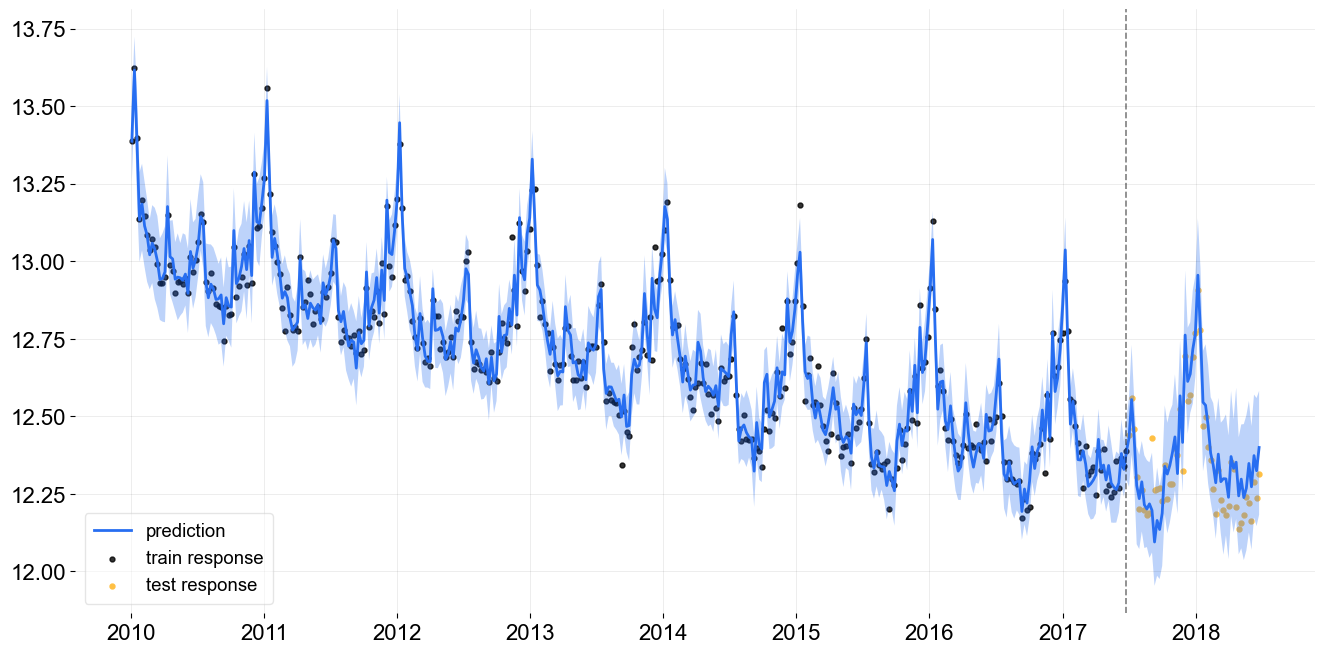

In [13]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

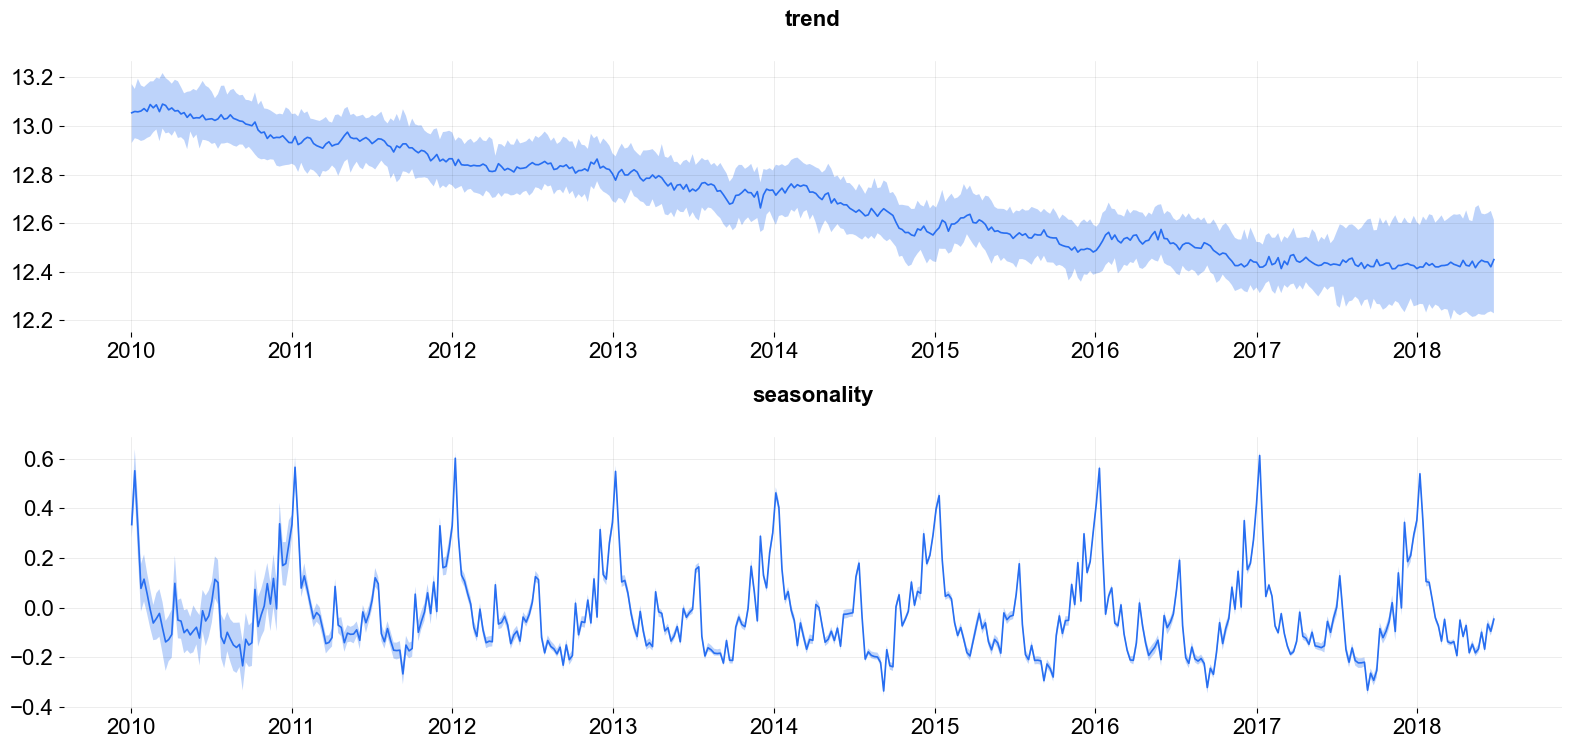

In [14]:
_ = plot_predicted_components(predicted_df=predicted_df, date_col='week')